## Communicate Data Finding Slide-Deck : Ford GoBike System Data
#### By : Abdelrhman Eltantawy
#### Investigation Overview
#### In this investigation we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Ford themselves. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it


## Dataset Overview
The dataset(s) provided to us by Ford contain the following fields:

 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender
 

#### and the most quastion we will look for is 
#### What are the features affecting trip duration the most ( weather , user type, age, weekdays) ?

In [182]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [183]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [184]:
df.shape

(183412, 16)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [186]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [187]:
# let's look for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [188]:
df['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [189]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [190]:
df['end_station_id'].value_counts()

67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
224.0       6
344.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

In [191]:
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

there are null values in a six columns in our dataset so let's explore them to see how we can deal with them 

In [192]:
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1927.0        1
1910.0        1
1930.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [193]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

so the best way i see for these null values in each one of the columns is to drop the null values in them that the most effective way, I thought I could fill the null in member_gender with male variable but the missing values is just too large for this column to be filled to with this.

let's drop the null values from the dataframe

In [194]:
# drop the null values
df.dropna(subset=['member_gender', 'member_birth_year','end_station_id','end_station_name'], inplace=True)
df.head().isnull().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [195]:
#check for duplicates
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

there's no duplicated values in the dataset 

In [196]:
#changing data type of start_time and end_time to datetime.
# fixing the dtypes problems.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['member_birth_year'] = df['member_birth_year'].astype(int)
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

## Univariate Exploration

Let's start our exploration by looking at the first variable: duration_sec. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [197]:
np.log10(df['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [198]:
df['duration_sec'].value_counts()

272      308
323      285
305      282
369      280
306      276
        ... 
39478      1
4187       1
15123      1
32055      1
7958       1
Name: duration_sec, Length: 4429, dtype: int64

## Univariate Exploration

Let's start our exploration by looking at the first variable: duraion_sec. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [199]:
def histplot(y, xvar,figsize=[14, 6]):
    # this function generates a histogram that eplains the distrbution of trip duraion in seconds
    # are the data = df and the x axis is duration in sec and the y axis is the counts 
    # output: the histogram plot that illustrate the duration trips most frequent or the distrbution of age
    if xvar == 'duration_sec':
        bins = np.arange(y[xvar].min(), y[xvar].quantile(0.99)+300, 300)
    elif xvar == 'duration_min':
        bins = 10 ** np.arange(0, 2+0.1, 0.2)
    elif xvar == 'age':
        bins = np.arange(y[xvar].min(), y[xvar].max()+5, 5)
    else:
        print('incorrect bins')
        
    plt.hist(x=xvar, data=y, bins=bins)
    

    # for labels add a space before an uppercase letter 
    xvar = xvar.replace('_', ' ')
    # add a title and format it 
    plt.title(f'distrbution of {xvar}'.title(), fontsize=10, weight='bold')
    # add a x label and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    # add a y label and format it 
    plt.ylabel('frequency'.title(), fontsize=10, weight='bold')

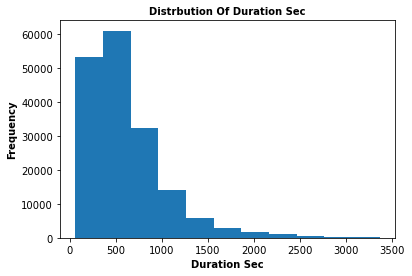

In [200]:
histplot(df,'duration_sec')

the distrbution is right skewed 

i having a little trouble in analyzing this column as it's in seconds so let's transform it into minutes and see what happens next 

In [201]:
df['duration_min'] = df['duration_sec'] / 60 

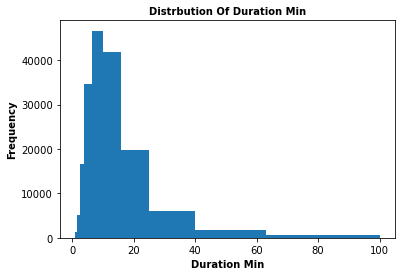

In [202]:
# let's now view the distbution in minutes
histplot(df, 'duration_min')


we can notice that most of the bike riders are using the bikes for a short period of time approximately ranging from 10 to 15 minutes  

In [203]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.90


In [204]:
# let's explore other data that i belive might be useful before going further which is user_type and gender
#  first let's explore user_type 
df['user_type'].value_counts()


Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

okay so most of the bike users are subscriber by a high difference than the customers

In [205]:
# let's move to gender now 
gender_type = df['member_gender'].value_counts()
gender_type

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

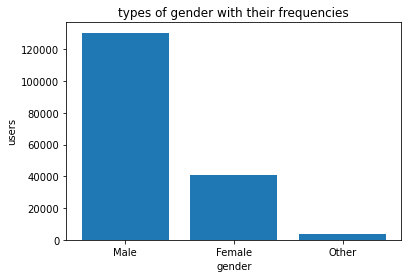

In [206]:
plt.xlabel('gender')
plt.ylabel('users')
plt.title('types of gender with their frequencies')
plt.bar(data=df,x= gender_type.keys(), height=gender_type);


we can see that males are the highest gender in useing the bike 

In [207]:
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')



In [208]:
order_of_days = df['start_day'].value_counts()
days_index = order_of_days.index

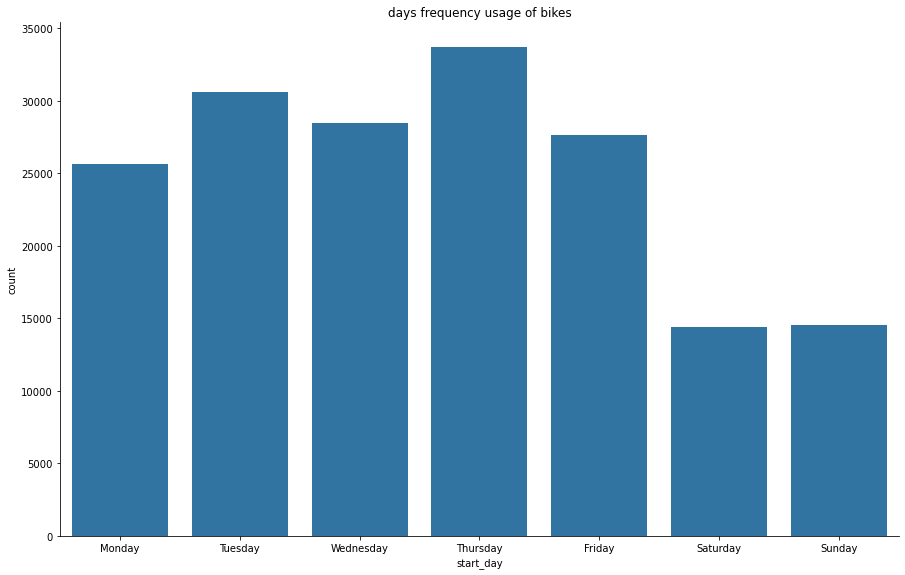

In [209]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sns.color_palette()[0]

freq_days = sns.catplot(data=df, x='start_day',kind='count' ,color=base_color, order=day_order)
plt.title('days frequency usage of bikes')
freq_days.fig.set_size_inches(14,8);

the thursday is most popular day for usage of the bike system after it comes tuesday.

In [210]:
# I created a new column for age 
df['age'] = 2019 - df['member_birth_year']


## Bivariate Exploration
We will investigate the relationships between various pairs of variables, in this section, to try and answer the above question.

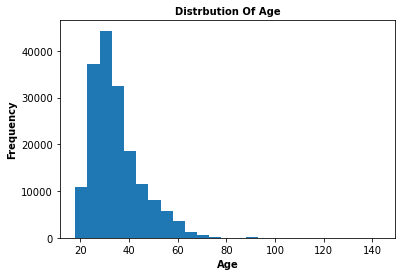

In [211]:
# let's start by looking the relationship between age and duration 
histplot(df, 'age')

the graph above tell's us that most of the users age are between 20 and 40 and their average duration is between 0 and 400 minutes

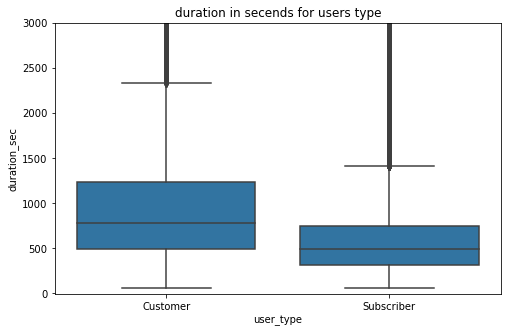

In [212]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('duration in secends for users type');


even though the subscriber are higher in numbers of using the bikes but the customers are the ones who ride it longer in duration, but also the subscriber has more outliers than the customers

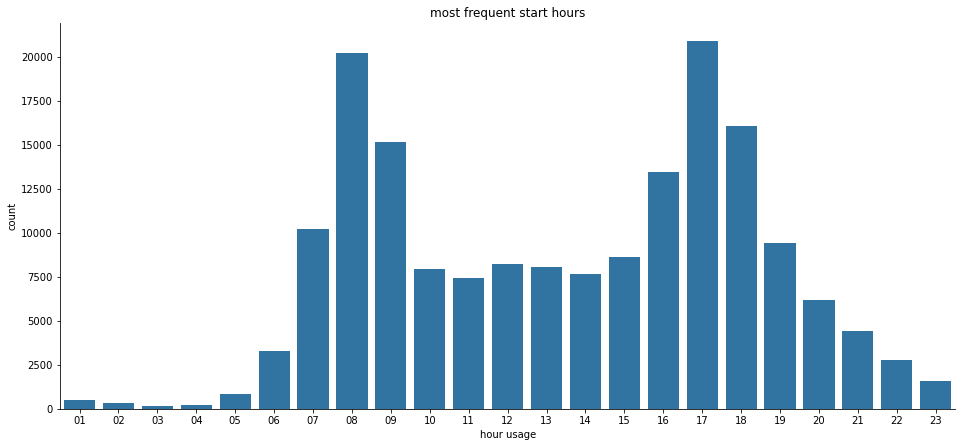

In [213]:
hours_order = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'];
hours_freq = sns.catplot(x='start_hourofday', kind='count', color=base_color, data=df, aspect=1.5, order=hours_order);
plt.xlabel('hour usage')
plt.title('most frequent start hours')
hours_freq.fig.set_size_inches(14,6);


the most frequent usage is 8am in the morning, and 5pm in the night.

In [214]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hourofday,start_day,start_month,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,869.75,2019-02-28,17,Thursday,February,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,1030.90,2019-02-28,12,Thursday,February,47


## Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type play into the relationship between trip duration and age.

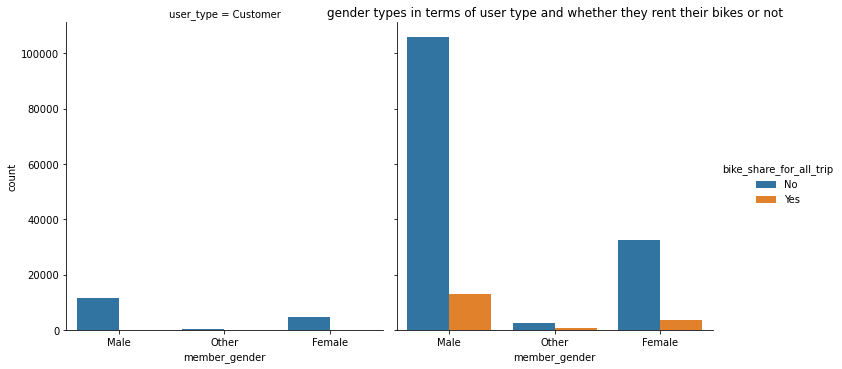

In [215]:
sns.catplot(x='member_gender', hue='bike_share_for_all_trip', col='user_type', kind='count', data=df)
plt.title('gender types in terms of user type and whether they rent their bikes or not');

the graph tells us that most of the subscreber does rent their bikes and who does this mostly are the males 


In [216]:
def graph_user(n,xvar, yvar, cvar, graph):
    # this function creats either a scatter plot or point plot it depends on the aurgemnt you include 
    # input: the dataset name, start_time, duration_sec, user_type, the graph you d'like 
    # output: the plot which it illustrate the trip duration in of each user in terms of weekdays 


    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sns.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=day_order)
        
        
    else:
        plt.figure(figsize=(14,6))
        graph = sns.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
        
        
    plt.title('the trip duration in of each user in terms of weekdays')
    
        


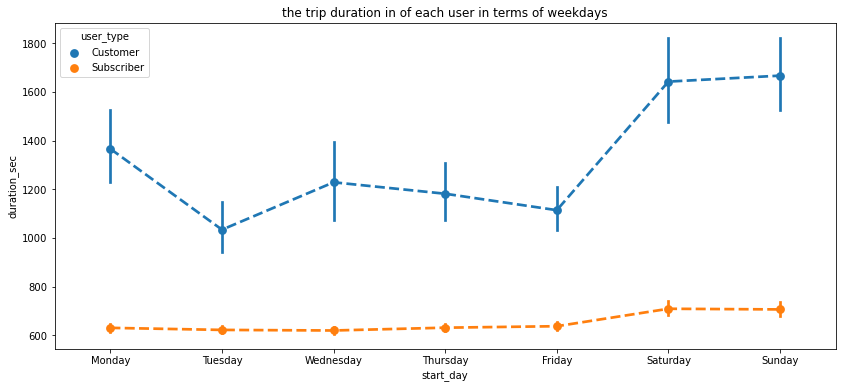

In [217]:
graph_user(df, 'start_day', 'duration_sec', 'user_type', 'line')

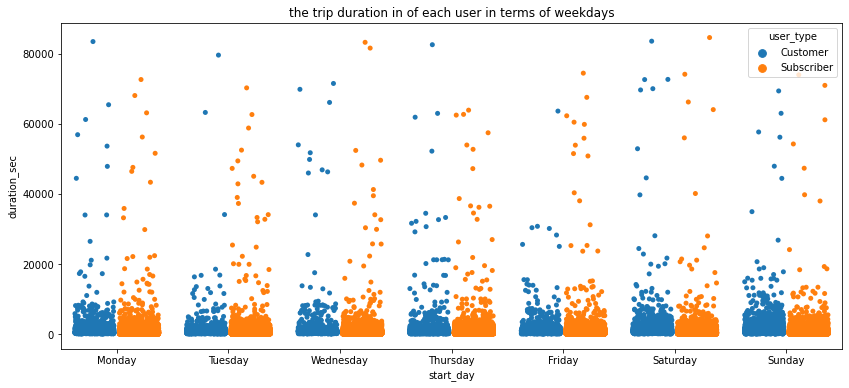

In [218]:
# let's show the actual data to recive in a scatterplot more insights 
graph_user(df, 'start_day', 'duration_sec', 'user_type', 'point')

## conclusions
#### bike duartion is between 15 or 10 minutes wich is short amount of time 
#### most of of age of the users is between 20 and 40 
#### thursday and tuesday has the most usage of the bikes 
#### most frequent usage hours are 8 o'clock in the monrning and 5 afternoon which relates to the regular working hours to most people
#### the customers use the bikes for longer periods than subscribers even though the subscribers are much highr in terms of numbers having the sunday and satuarday the most usage days which are the weekends